# intelligent_placer

Данный пакет представляет собой функцию *"check_image"*, в которую пользователь должен передать путь к изображению.
На изображении должен быть многоугольник и предметы.
Функция ответит на вопрос можно ли поместить предметы в многоугольник и выведет результаты на экран.
В качестве результата может быть выведено изображение с размещением предметов в многоугольнике и результат (True/False) или же, если нет необходимости отрисовки изображений на экран, то просто результат, для этого в нее нужно передать дополнительный параметр False.

Более подробную информацию о требованиях ввода и вывода можно прочитать в файле README.md

Здесь же будут приведены результаты тестов данной библиотеки и краткое описание алгоритма.

## Основная задумка

Сперва происходит чтение файла с изображением из директории, переданной на вход функции. Далее следует обработка изображения для дальнейшей работы, а именно для извлечения с изображения всех контуров, имеющихся на нем. Все контуры разбиваются на контур многоугольника и контуры предметов, а затем преобразуются в экземпляры класса *Polygon* из библиотеки *shapely.geometry*. Полученные полигоны подаются на вход основному алгоритму вычисления оптимального расположения предметов в многоугольнике. Алгоритм выдает резултат в формате *"True"* - предметы могут поместиться в многоугольник и *"False"* - предметы не могут поместиться в многоугольник. Так же алгоритм сохраняет результат в директорию *"images/results"*. Результат сохраняется в виде изображения, на котором продемонстрирован пример размещения предметов в многоугольнике, или же выведена надпись "FALSE" в случае если предметы разместить не получилось. Изначально функционал вывода изображений на экран включен, но может быть выключен вторым входным параметром *"show_results=False"* переданным в функцию *"check_image"*

## Принцип работы алгоритма

Алгоритм основан на минимизации функции, с помощью метода дифференциальной эволюции (*differential_evolution from scipy.optimize*).  
Функция цели, которая определяет оптимальное расположение предметов в многоугольнике учитывает в себе 2 параметра: площадь пересечения многоугольника с предметом и расстояние от центра предмета до центра многоугольника.  
Метод дифференциальной эволюции, в свою очередь, перемещает и вращает предмет в многоугольнике. В качестве параметров в метод передаются так называемые "степени свободы" предмета (перемещение по ширине, высоте и вращение).  
Метод запускается *N* раз для каждого предмета по очереди, чтобы улучшить точность найденной позиции.  
После чего найденное положение предмета отсекается из многоугольника, и алгоритм продолжает свою работу уже с меньшим (по площади) многоугольником.  
То есть, если объяснять простыми словами, алгоритм для каждого предмета находит оптимальное положение максимально близко к границе многоугольника, а затем вырезает из многоугольника кусок, где находится предмет.

## Демонстрация работы

Для более удобного тестирования работы пакета была написана вспомогательная функция *"placer_demo"*, которой на вход необходимо передать два параметра: путь до директории с изображениями и путь до файла Excel, в котром находсятся названия файлов, ожидаемый результат и описание теста.  
Поэтому для демонстрации работы программы на других тестах достаточно всего лишь изменять Excel файл и помещать новые изображения в указанную директорию.  
Если у Вас будет желание самостоятельно тестировать данный пакет, то, пожалуйста, соблюдайте требования, указанные в файле README.md

Для начала установим все необходимые библиотеки для работы программы

In [1]:
pip install -r requirements.txt

Импортируем демонстрационную функцию

In [2]:
from intelligent_placer_lib import placer_demo

Создадим две переменные, куда поместим путь до файла Excel и путь до изображений

In [3]:
PATH_EXCEL = "info.xlsx"
PATH_DATASET = "images/dataset/"

Теперь можно приступить к самому тестированию пакета *"intelligent_placer_lib"*

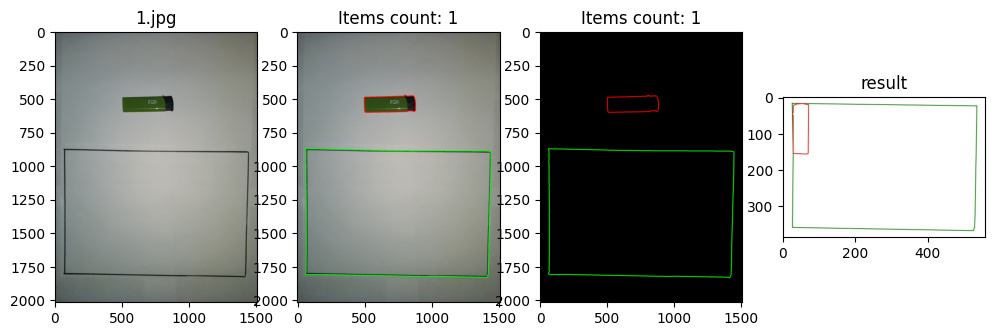

TEST 1 passed
filename: 1.jpg 	result: True	correct result: True
description: Один предмет может поместиться в максимальный по площади многоугольник


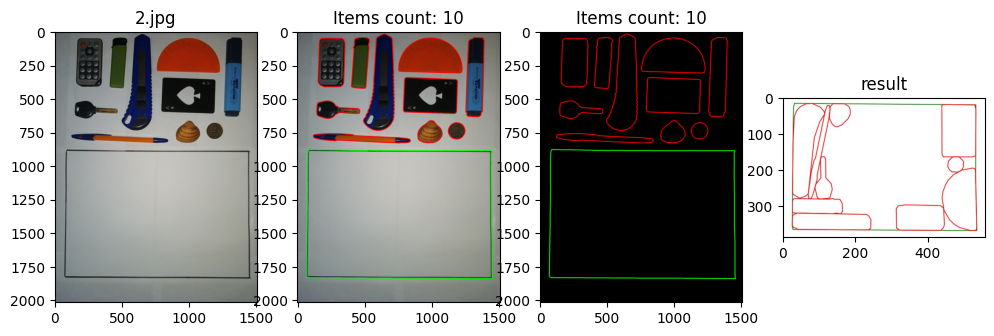

TEST 2 passed
filename: 2.jpg 	result: True	correct result: True
description: Все имеющиеся предметы могут поместиться в максимальный по площади многоугольник


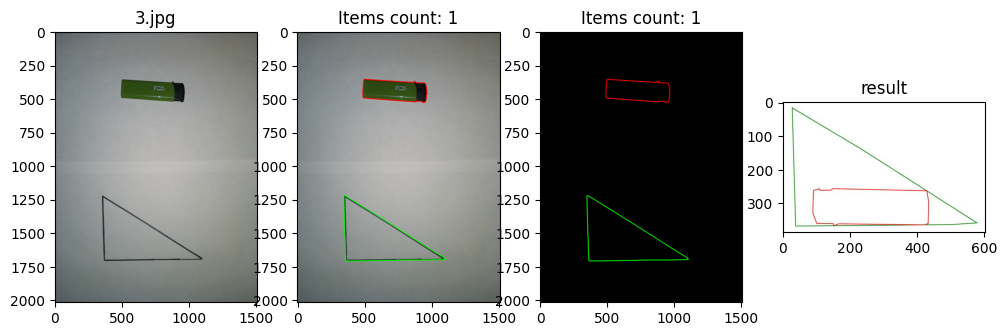

TEST 3 passed
filename: 3.jpg 	result: True	correct result: True
description: Предмет еле-еле помещается в многоугольник


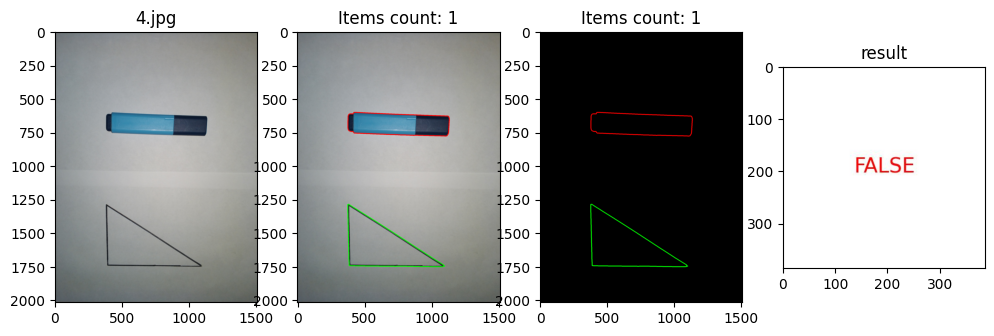

TEST 4 passed
filename: 4.jpg 	result: False	correct result: False
description: Предмет уже не помещается в многоугольник


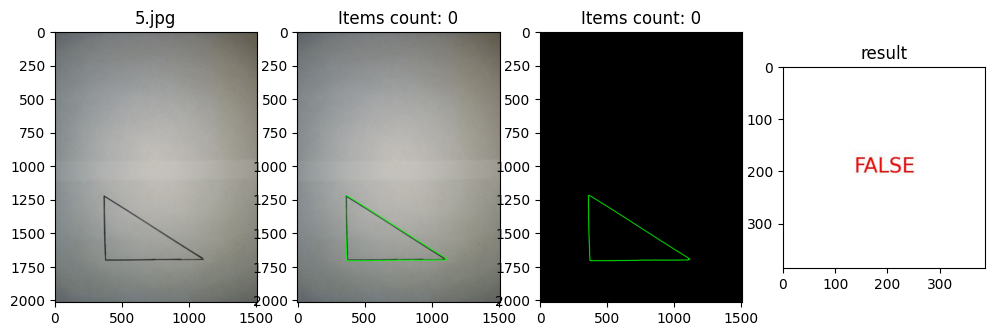

TEST 5 passed
filename: 5.jpg 	result: False	correct result: False
description: Отсутствие предметов


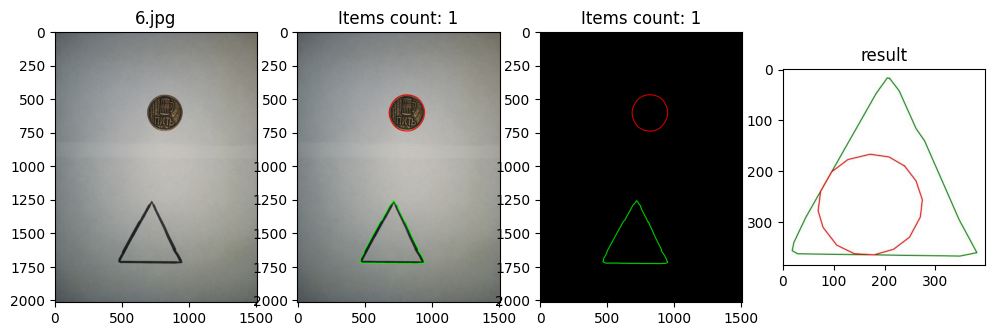

TEST 6 passed
filename: 6.jpg 	result: True	correct result: True
description: Самый маленький предмет и самый маленький многоугольник


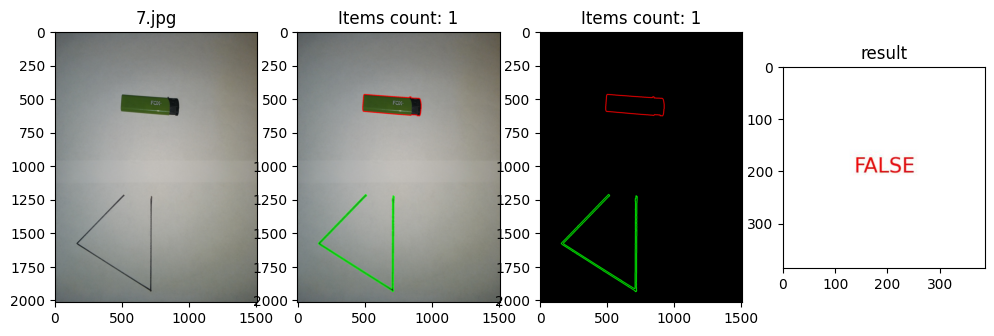

TEST 7 passed
filename: 7.jpg 	result: False	correct result: False
description: Незамкнутый многоугольник


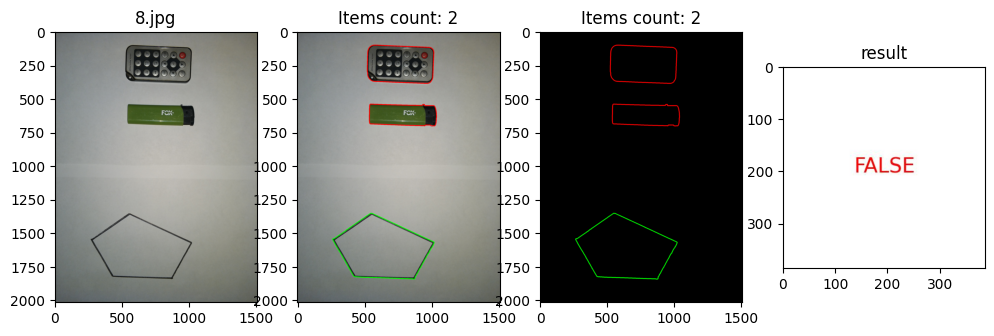

TEST 8 passed
filename: 8.jpg 	result: False	correct result: False
description: Два предмета, каждый из которых по отдельности помещается, но вместе - нет


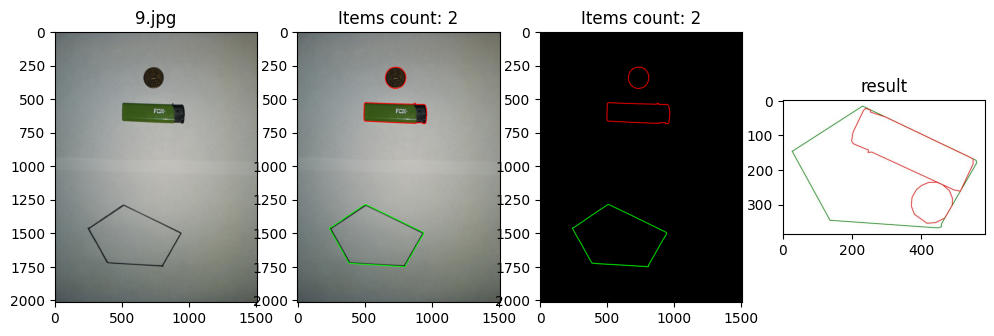

TEST 9 passed
filename: 9.jpg 	result: True	correct result: True
description: Два предмета, каждый из которых по отдельности помещается, и вместе - тоже


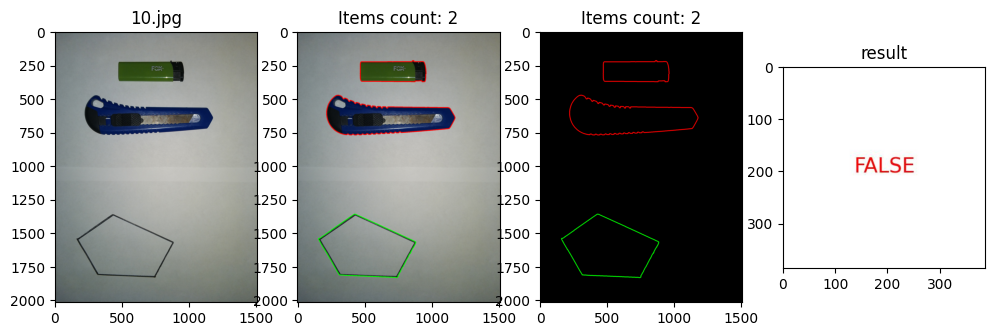

TEST 10 passed
filename: 10.jpg 	result: False	correct result: False
description: Два предмета, один из которых помещается в многоугольник, а другой - нет


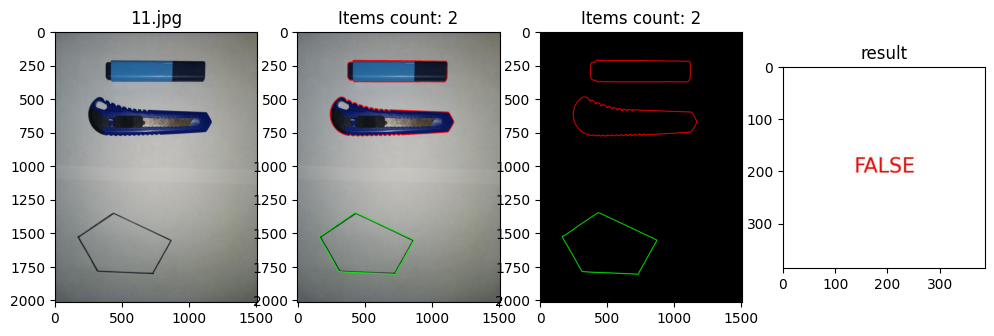

TEST 11 passed
filename: 11.jpg 	result: False	correct result: False
description: Два предмета, каждый из которых не помещается в многоугольник


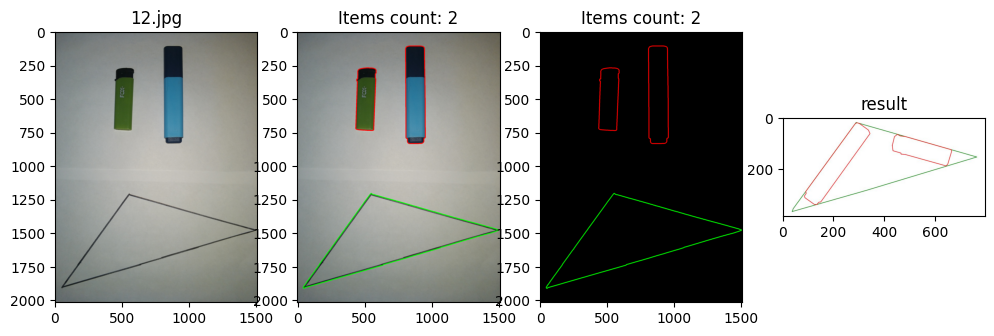

TEST 12 passed
filename: 12.jpg 	result: True	correct result: True


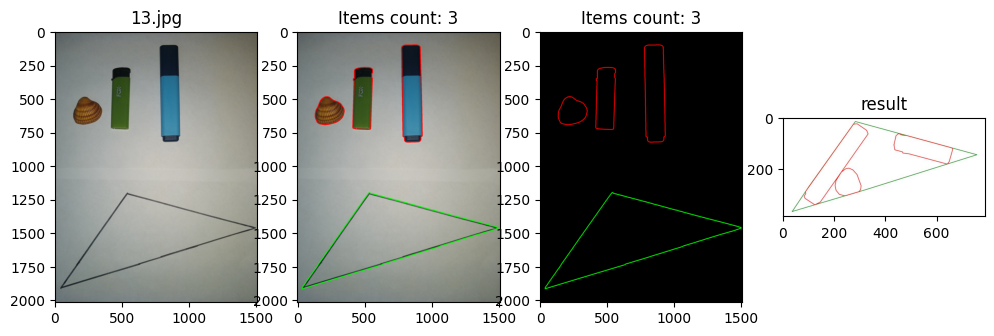

TEST 13 passed
filename: 13.jpg 	result: True	correct result: True


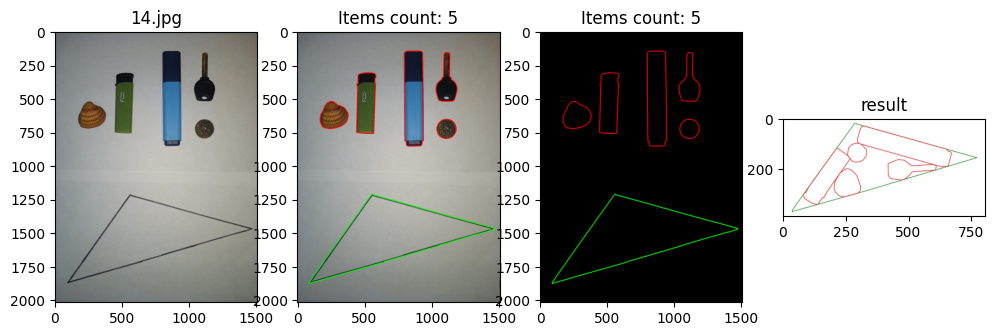

TEST 14 passed
filename: 14.jpg 	result: True	correct result: True


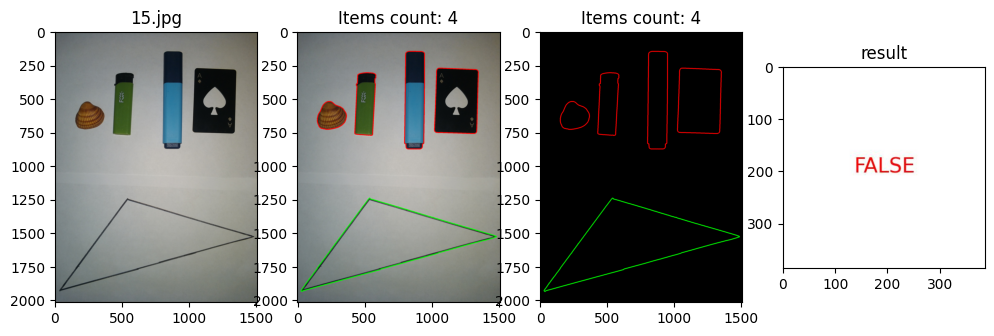

TEST 15 passed
filename: 15.jpg 	result: False	correct result: False


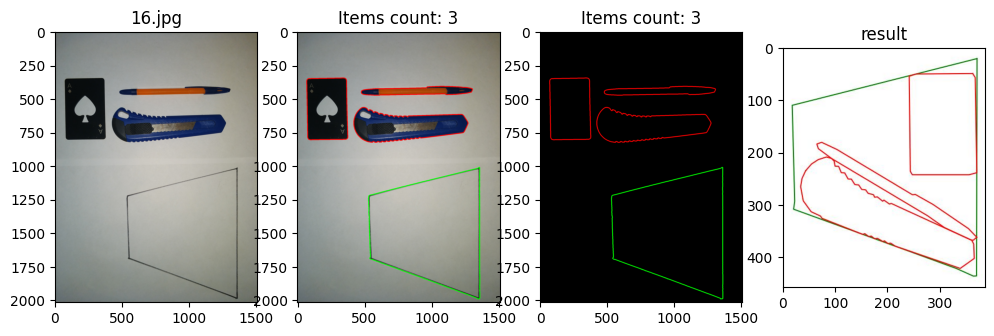

TEST 16 passed
filename: 16.jpg 	result: True	correct result: True


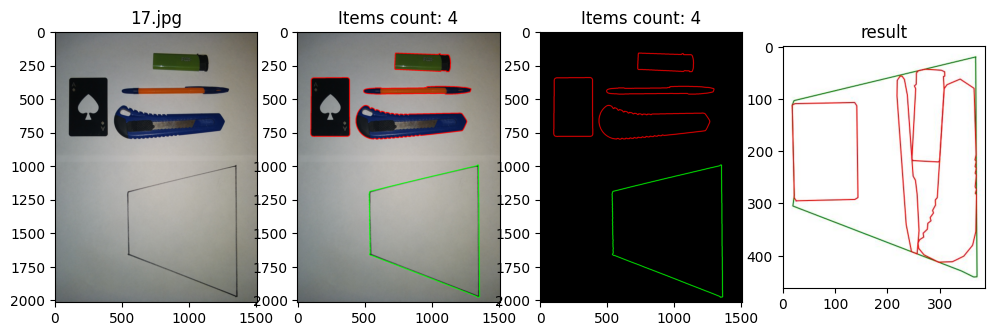

TEST 17 passed
filename: 17.jpg 	result: True	correct result: True


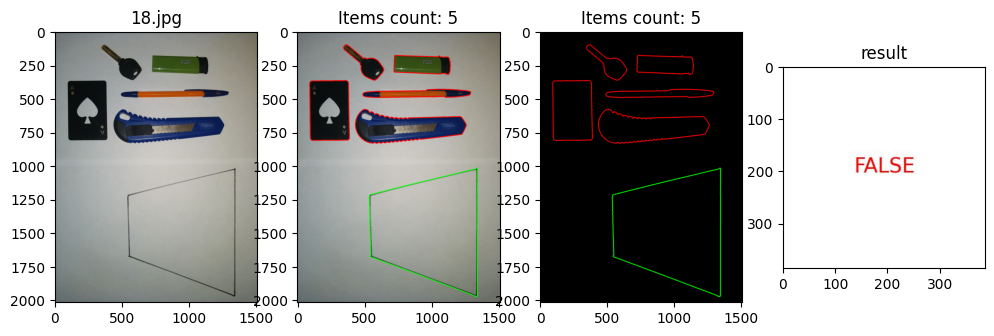

TEST 18 passed
filename: 18.jpg 	result: False	correct result: False


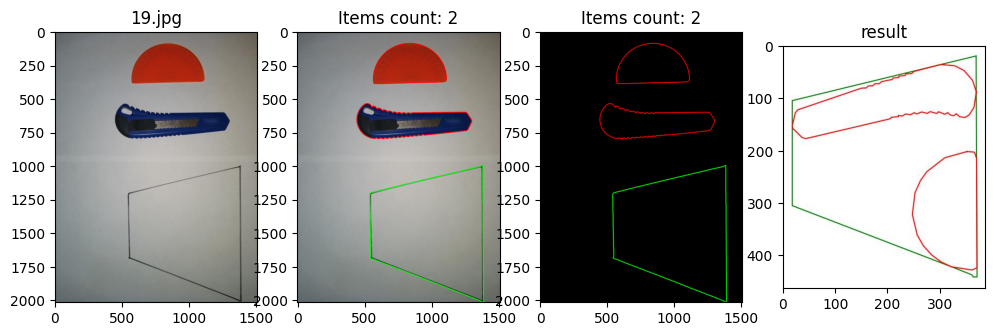

TEST 19 passed
filename: 19.jpg 	result: True	correct result: True


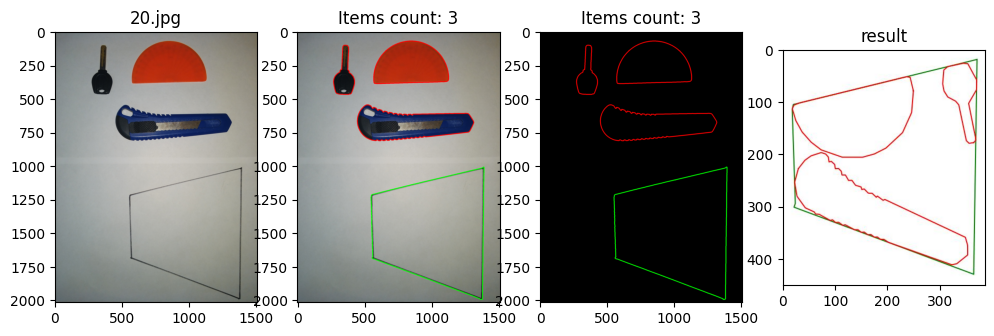

TEST 20 passed
filename: 20.jpg 	result: True	correct result: True


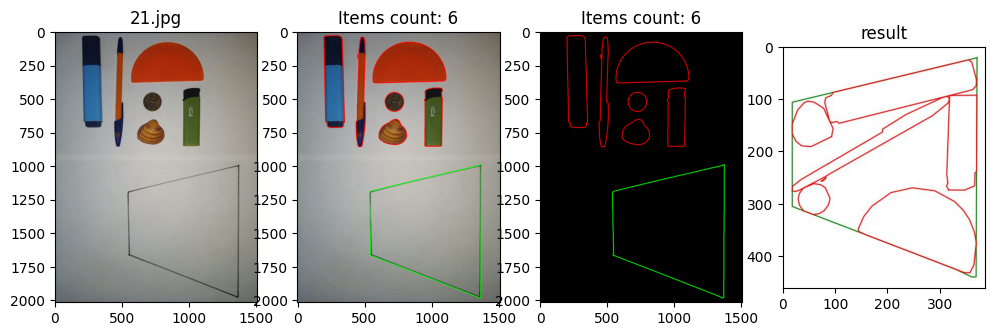

TEST 21 passed
filename: 21.jpg 	result: True	correct result: True


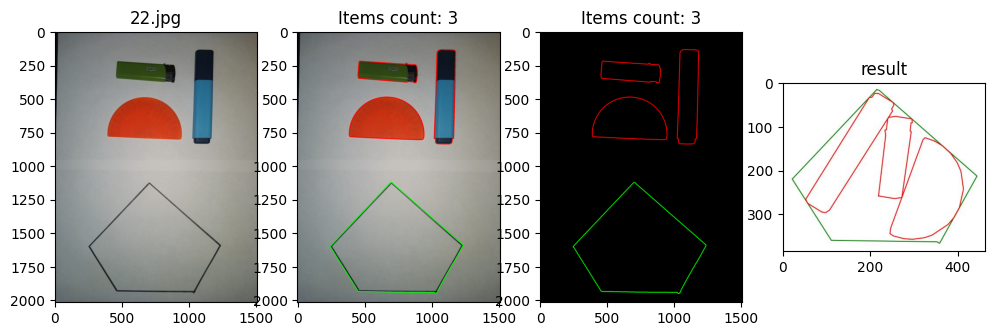

TEST 22 passed
filename: 22.jpg 	result: True	correct result: True


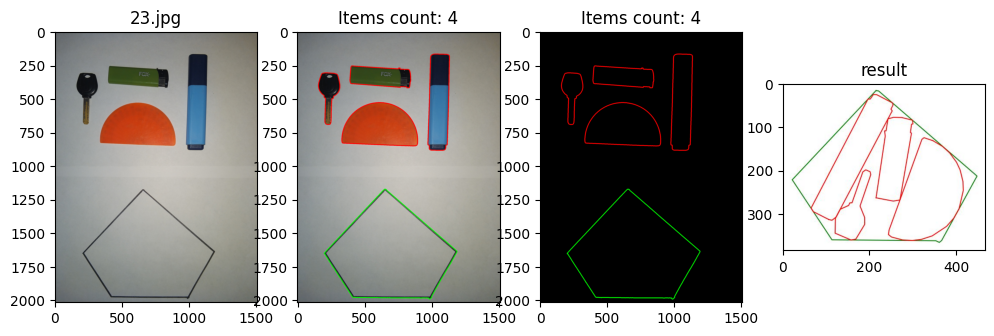

TEST 23 passed
filename: 23.jpg 	result: True	correct result: True


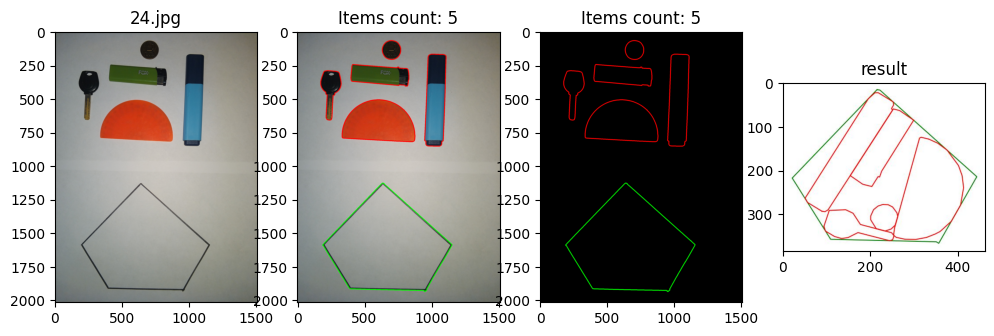

TEST 24 passed
filename: 24.jpg 	result: True	correct result: True


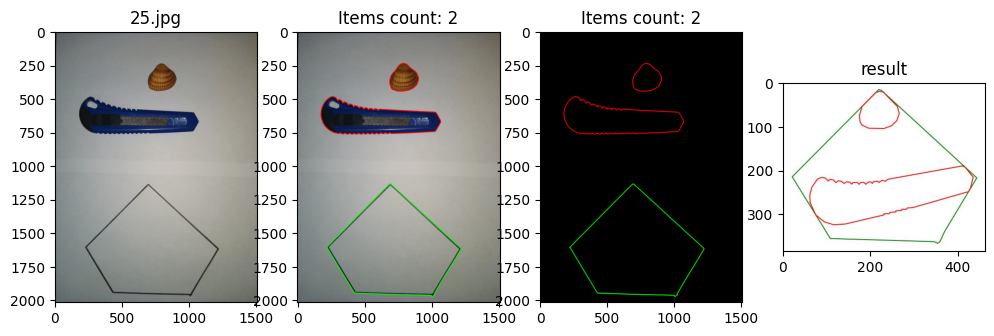

TEST 25 passed
filename: 25.jpg 	result: True	correct result: True


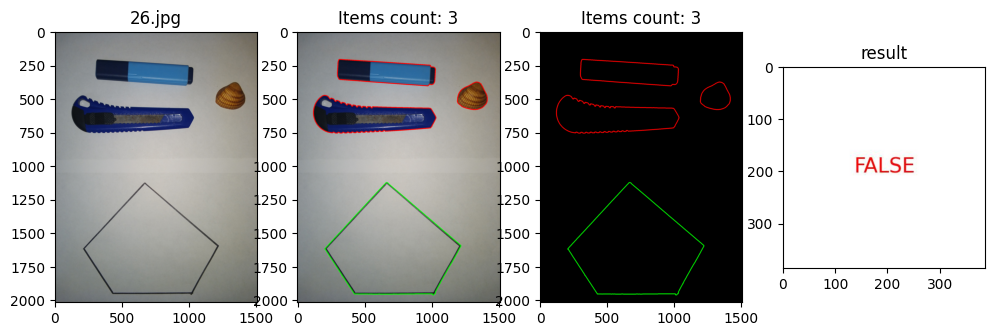

TEST 26 passed
filename: 26.jpg 	result: False	correct result: False


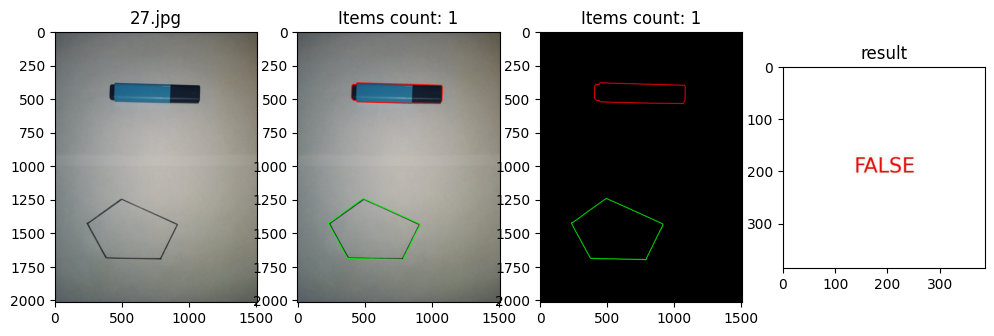

TEST 27 passed
filename: 27.jpg 	result: False	correct result: False


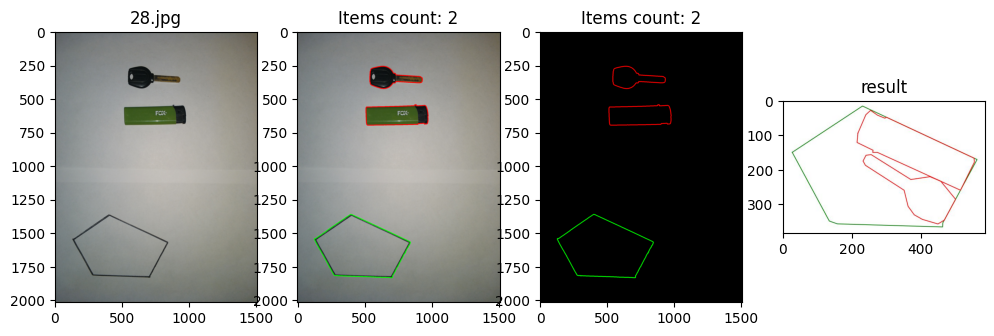

TEST 28 passed
filename: 28.jpg 	result: True	correct result: True


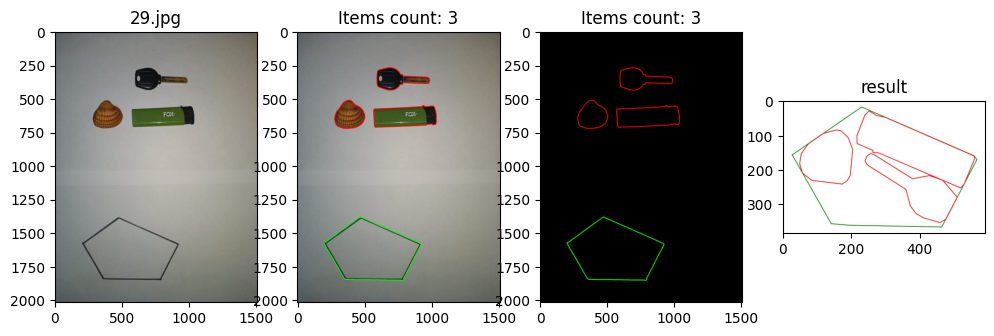

TEST 29 passed
filename: 29.jpg 	result: True	correct result: True


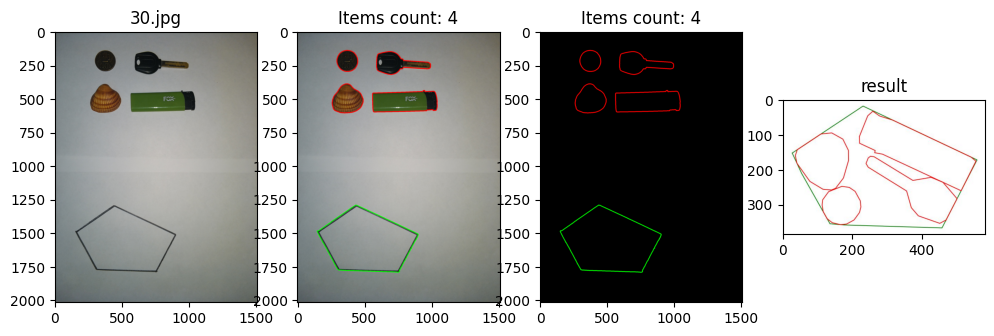

TEST 30 passed
filename: 30.jpg 	result: True	correct result: True


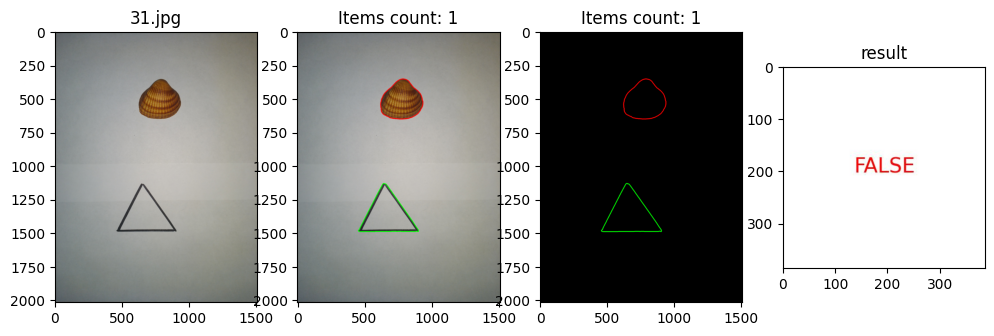

TEST 31 passed
filename: 31.jpg 	result: False	correct result: False


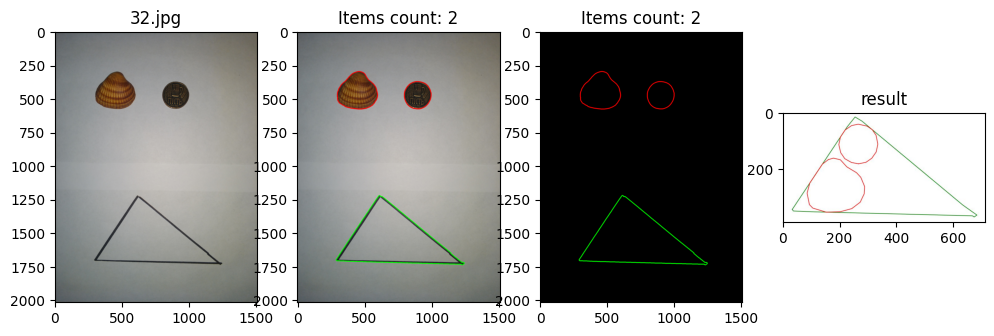

TEST 32 passed
filename: 32.jpg 	result: True	correct result: True


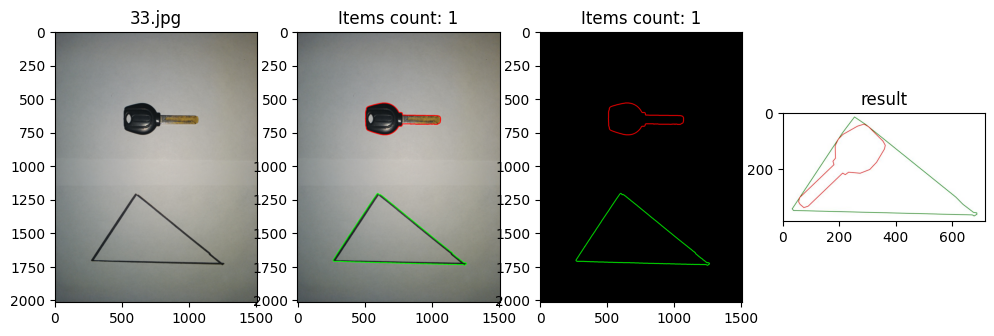

TEST 33 passed
filename: 33.jpg 	result: True	correct result: True


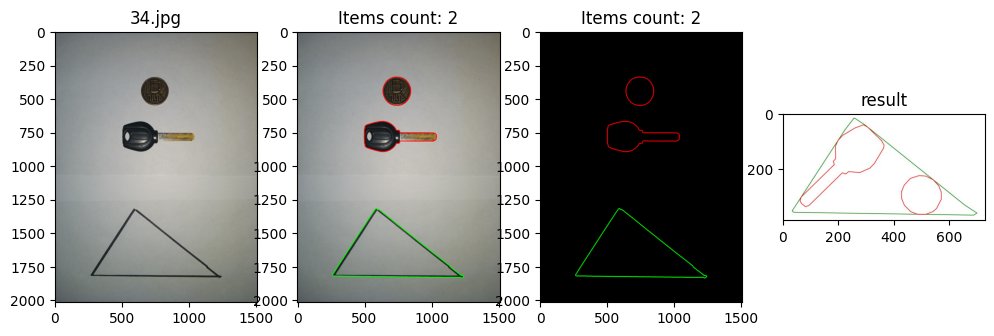

TEST 34 passed
filename: 34.jpg 	result: True	correct result: True


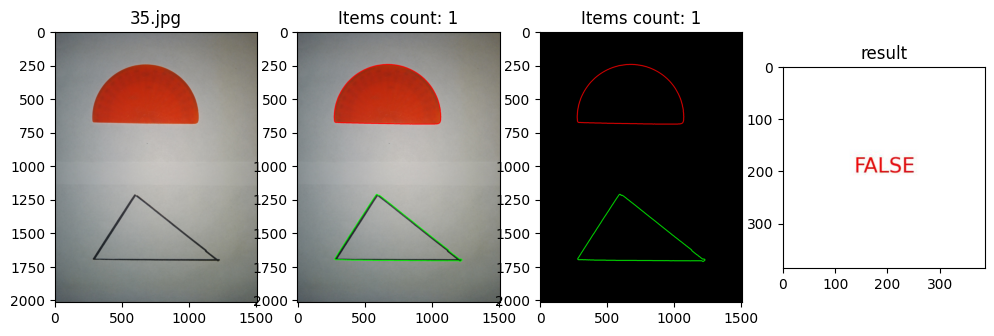

TEST 35 passed
filename: 35.jpg 	result: False	correct result: False


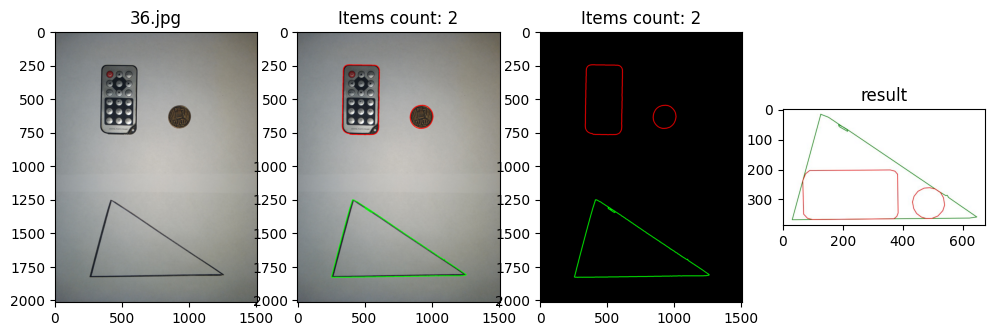

TEST 36 passed
filename: 36.jpg 	result: True	correct result: True


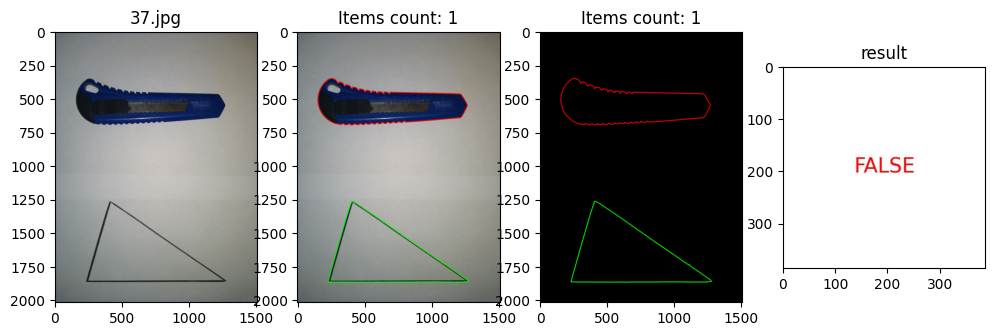

TEST 37 passed
filename: 37.jpg 	result: False	correct result: False


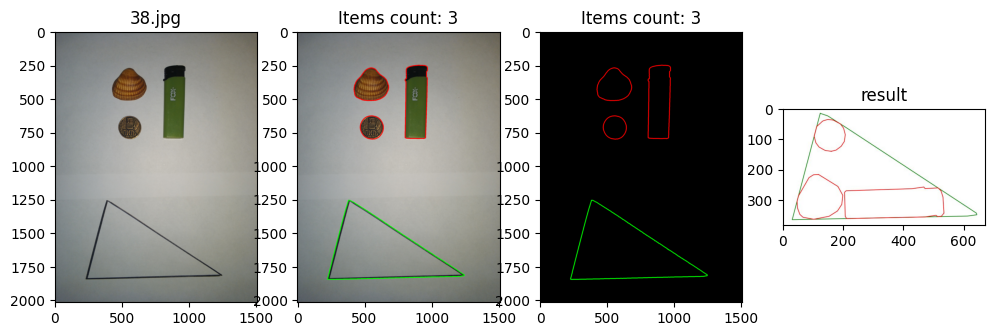

TEST 38 passed
filename: 38.jpg 	result: True	correct result: True


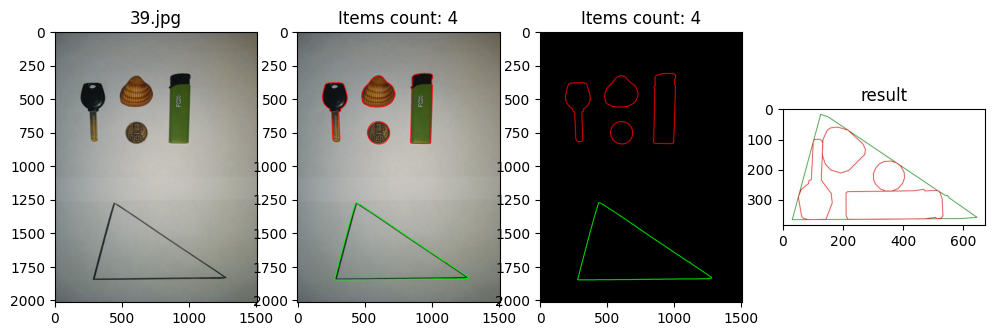

TEST 39 passed
filename: 39.jpg 	result: True	correct result: True


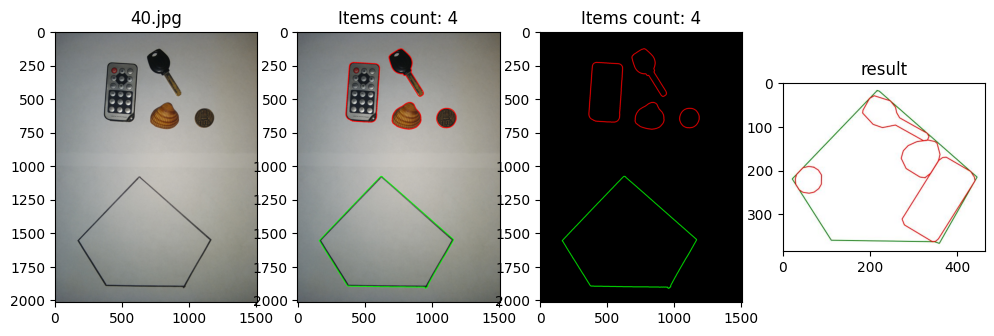

TEST 40 passed
filename: 40.jpg 	result: True	correct result: True


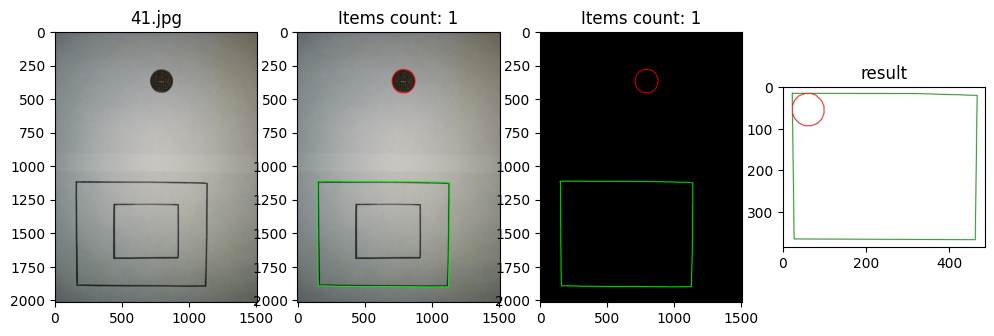

TEST 41 passed
filename: 41.jpg 	result: True	correct result: True
description: Многоугольник с дырой внутри


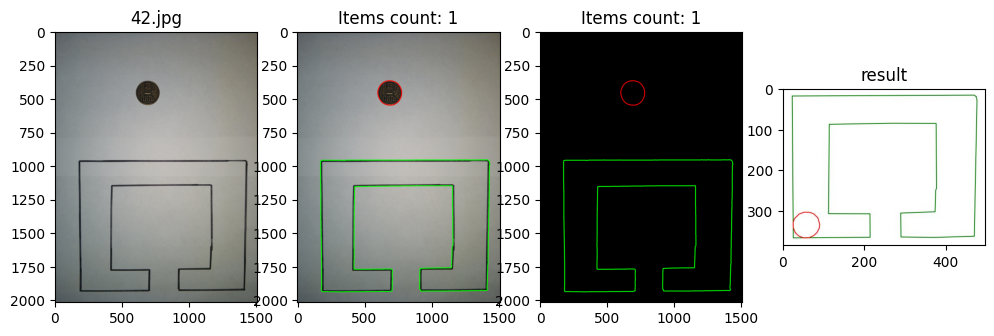

TEST 42 passed
filename: 42.jpg 	result: True	correct result: True
description: Многоугольник странной формы


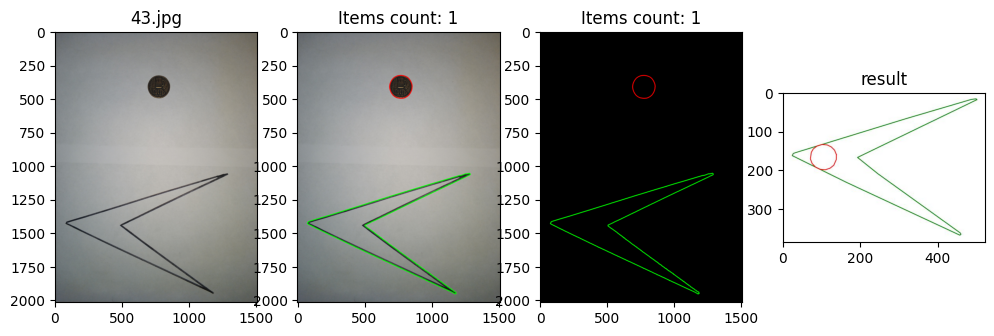

TEST 43 passed
filename: 43.jpg 	result: True	correct result: True
description: Сильно невыпуклый многоугольник


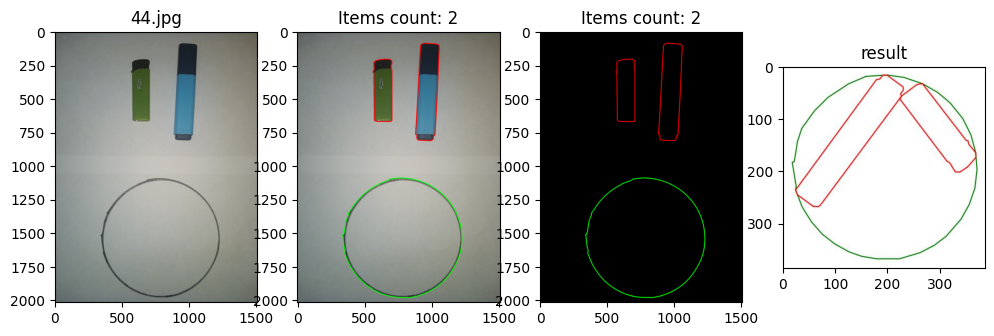

TEST 44 passed
filename: 44.jpg 	result: True	correct result: True
description: Окружность


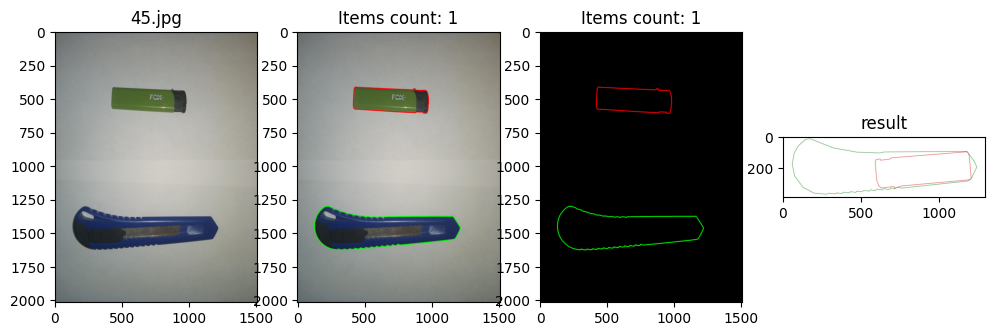

TEST 45 passed
filename: 45.jpg 	result: True	correct result: True
description: Зажигалка в нож


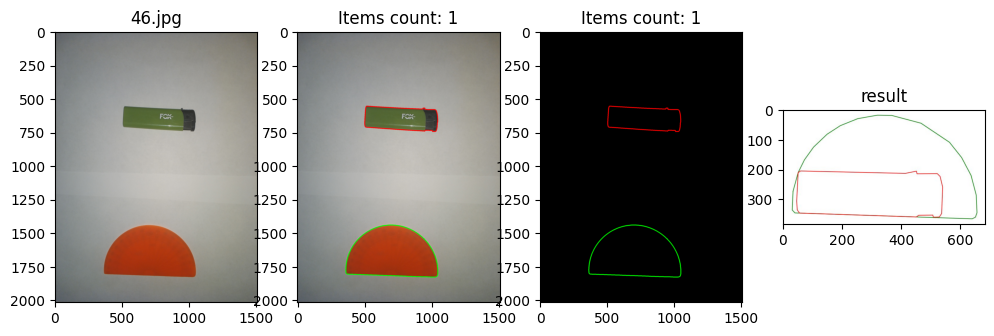

TEST 46 passed
filename: 46.jpg 	result: True	correct result: True
description: Зажигалка в транспортир

All 46 tests were completed!
Success count: 46
Fail count: 0
Success rate: 100.0 %



In [4]:
placer_demo(path_excel=PATH_EXCEL, path_dataset=PATH_DATASET)

## Результаты тестирования

Можно увидеть, что алгоритм имеет очень хорошую точность решения данной задачи. Все тесты были успешно пройдены. Кроме того, он работает довольно быстро (47 секунд для фотографии с десятью предметами и большим многоугольником).  
Последние шесть тестов выходят за рамки постановки задачи, которая описана в файле README.md.  
На 41, 42, 43 тестах мы можем видеть довольно странные многоугольники, которые не являются выпуклыми. На 44 тесте продемонстрирована даже окружность вместо многоугольника. Но так как у меня не было уверенности в том, что на таких тестах алгоритм будет работать так же точно, как и на первых 40, да и времени на изучение этого вопроса и проведение тестов так же уже было недостаточно, мною было принято решение исключить возможность задания таких фигур. Кроме того, на 41 тесте многоугольник вообще расценивается неправильно из-за выбранного мною способа распознавания контуров. Но я не исключаю возможность, что при должном исследовании этой темы, можно расширить постановку задачи, не внося значительных изменений в алгоритм.  
На 45 и 46 тестах мы видим то, как зажигалка помещается в канцелярский нож и в транспортир. Эти два теста были сделаны для того, чтобы показать, что с данной программой можно довольно весело играться, если отойти от требований на входные данные.  
Но в целом, если следовать требованиям поставленной задачи, то алгоритм справляется со всеми тестами.

## Заключение

Данная работа оказалась довольно интересной из-за большого количество способов ее реализации. Интересно было узнать про методы обработки изображений и дальнейшей работы с ними, а так же про способы оптимизации функций цели. Полученные знания по этой теме наверняка пригодятся в дальнейшем. Но, к сожалению, из-за обилия других предметов в учебной программе, не удалось изучить эту тему до конца, чтобы не накладывать столько ограничений на постановку задачи.

----------------------------------

Редченко Евгений Юрьевич  
СПБПУ, ФизМех, гр.5030102/90401  
Лабораторная работа "Intelligent placer" по предмету "машинное обучение"  
14 декабря 2022 г.